Import the libraries necessary to analize data

In [814]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [815]:
df = pd.read_csv('../df_after_dp.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197914 entries, 0 to 197913
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            197914 non-null  datetime64[ns]
 1   state                           197914 non-null  object        
 2   city_or_county                  197914 non-null  object        
 3   latitude                        197914 non-null  float64       
 4   longitude                       197914 non-null  float64       
 5   congressional_district          197914 non-null  int64         
 6   avg_age_participants            197914 non-null  float64       
 7   n_participants_child            197914 non-null  int64         
 8   n_participants_teen             197914 non-null  int64         
 9   n_participants_adult            197914 non-null  int64         
 10  n_males                         197914 non-null  int64  

In [816]:
df['avg_age_participants'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 197914 entries, 0 to 197913
Series name: avg_age_participants
Non-Null Count   Dtype  
--------------   -----  
197914 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


Since we use distance metric working on numerical features we remove the categorical data and useless features 

In [817]:
df.columns

Index(['date', 'state', 'city_or_county', 'latitude', 'longitude',
       'congressional_district', 'avg_age_participants',
       'n_participants_child', 'n_participants_teen', 'n_participants_adult',
       'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested',
       'n_unharmed', 'n_participants', 'incident_characteristics1',
       'povertyPercentage', 'party', 'candidatevotes', 'totalvotes',
       'total_votes_for_state', 'males_percentage', 'females_percentage',
       'child_percentage', 'teen_percentage', 'adult_percentage',
       'killed_percentage', 'injured_percentage',
       'killed_percentage_per_incident', 'unharmed_percentage',
       'winning_party_percentage', 'arrest_percentage',
       'killing_rate_per_state', 'injured_rate_per_state',
       'arrested_rate_per_state', 'unharmed_rate_per_state'],
      dtype='object')

In [818]:
column_to_drop = ['n_participants','n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed','date', 'latitude', 'longitude','congressional_district', 'candidatevotes', 'totalvotes', 'total_votes_for_state']
for col in df.columns:
    if df[col].dtype == 'object':
       column_to_drop.append(col)
column_to_drop

['n_participants',
 'n_participants_child',
 'n_participants_teen',
 'n_participants_adult',
 'n_males',
 'n_females',
 'n_killed',
 'n_injured',
 'n_arrested',
 'n_unharmed',
 'date',
 'latitude',
 'longitude',
 'congressional_district',
 'candidatevotes',
 'totalvotes',
 'total_votes_for_state',
 'state',
 'city_or_county',
 'incident_characteristics1',
 'party']

In [819]:
numeric_attributes = [item for item in df.columns if item not in column_to_drop]

<Axes: >

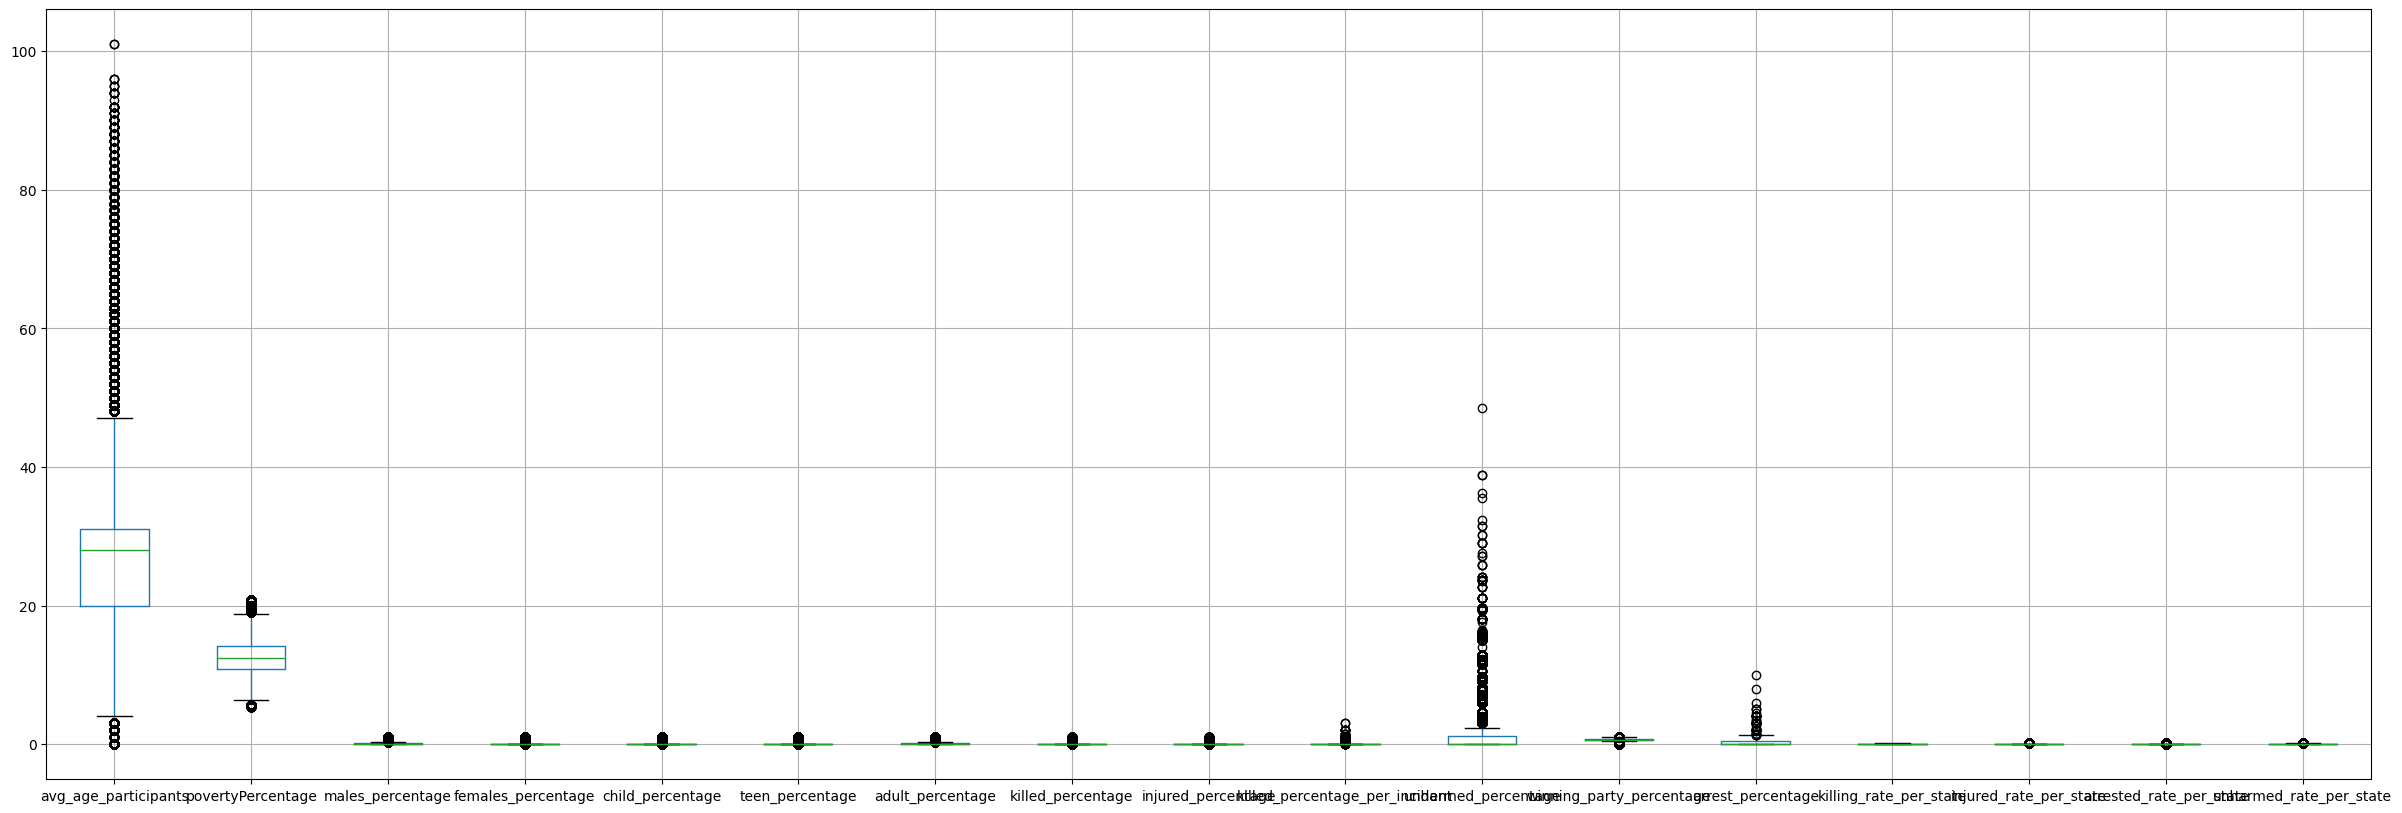

In [820]:
#df.boxplot(numeric_attributes, figsize=(30,10))


In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197914 entries, 0 to 197913
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            197914 non-null  datetime64[ns]
 1   state                           197914 non-null  object        
 2   city_or_county                  197914 non-null  object        
 3   latitude                        197914 non-null  float64       
 4   longitude                       197914 non-null  float64       
 5   congressional_district          197914 non-null  int64         
 6   avg_age_participants            197914 non-null  float64       
 7   n_participants_child            197914 non-null  int64         
 8   n_participants_teen             197914 non-null  int64         
 9   n_participants_adult            197914 non-null  int64         
 10  n_males                         197914 non-null  int64  

In [800]:
""" attr_to_log = ['avg_age_participants', 'povertyPercentage']
df[attr_to_log] = np.log(df[attr_to_log].values)
df[attr_to_log] = df[attr_to_log].replace(-np.inf, 0)
df[attr_to_log] = df[attr_to_log].fillna(value=0)  """

" attr_to_log = ['avg_age_participants', 'povertyPercentage']\ndf[attr_to_log] = np.log(df[attr_to_log].values)\ndf[attr_to_log] = df[attr_to_log].replace(-np.inf, 0)\ndf[attr_to_log] = df[attr_to_log].fillna(value=0)  "

In [822]:
df[numeric_attributes].describe()

,avg_age_participants,povertyPercentage,males_percentage,females_percentage,child_percentage,teen_percentage,adult_percentage,killed_percentage,injured_percentage,killed_percentage_per_incident,unharmed_percentage,winning_party_percentage,arrest_percentage,killing_rate_per_state,injured_rate_per_state,arrested_rate_per_state,unharmed_rate_per_state
count,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000,197914.000000
mean,26.675314,12.612205,0.148175,0.058712,0.009863,0.030458,0.147125,0.010681,0.010717,0.164287,1.000000,0.681462,0.254175,0.038489,0.040958,0.035870,0.039587
std,13.959938,2.712283,0.291783,0.209104,0.092274,0.152581,0.291245,0.038328,0.034086,0.328837,2.202684,0.130646,0.394619,0.025175,0.031900,0.022959,0.028770
min,0.000000,5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,10.800000,0.001842,0.000000,0.000000,0.000000,0.001727,0.000000,0.000000,0.000000,0.000000,0.596987,0.000000,0.019355,0.018107,0.020828,0.016291
50%,28.000000,12.400000,0.011173,0.000000,0.000000,0.000000,0.010753,0.000000,0.000000,0.000000,0.000000,0.667020,0.000000,0.035048,0.035897,0.032604,0.032451
75%,31.000000,14.100000,0.107143,0.000000,0.000000,0.000000,0.105263,0.000000,0.007937,0.000000,1.173487,0.749687,0.500000,0.056455,0.050379,0.041844,0.058971
max,101.000000,20.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,48.480537,1.000000,10.000000,0.103438,0.143588,0.130023,0.131173


In [802]:
df_numeric = df.drop(columns=column_to_drop)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197914 entries, 0 to 197913
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   avg_age_participants            197914 non-null  float64
 1   n_participants_child            197914 non-null  int64  
 2   n_participants_teen             197914 non-null  int64  
 3   n_participants_adult            197914 non-null  int64  
 4   n_males                         197914 non-null  int64  
 5   n_females                       197914 non-null  int64  
 6   n_killed                        197914 non-null  int64  
 7   n_injured                       197914 non-null  int64  
 8   n_arrested                      197914 non-null  int64  
 9   n_unharmed                      197914 non-null  int64  
 10  n_participants                  197914 non-null  int64  
 11  povertyPercentage               197914 non-null  float64
 12  males_percentage

## Normalization

A good practice is to scale data to avoid that some features dominates the others in the clustering, so we done it

In [803]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_numeric.values)
scaled_df = pd.DataFrame(X, columns=df_numeric.columns)

In [804]:
scaled_df.tail()

,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,...,killed_percentage,injured_percentage,killed_percentage_per_incident,unharmed_percentage,winning_party_percentage,arrest_percentage,killing_rate_per_state,injured_rate_per_state,arrested_rate_per_state,unharmed_rate_per_state
197909,0.267327,0.0,0.0,0.460317,0.483333,0.000000,0.0,0.00,0.460317,0.00,...,0.000000,0.00,0.000000,0.000000,0.754270,0.100000,0.905393,0.458909,0.688659,0.602139
197910,0.326733,0.0,0.0,0.507937,0.433333,0.333333,0.0,0.00,0.492063,0.05,...,0.000000,0.00,0.000000,0.079876,0.638471,0.096875,0.855355,0.486764,0.779174,0.821783
197911,0.198020,0.0,1.0,0.126984,0.283333,1.000000,0.0,0.00,0.555556,0.00,...,0.000000,0.00,0.000000,0.000000,0.801124,0.100000,0.290841,0.304853,0.466385,0.346009
197912,0.198020,0.0,1.0,0.126984,0.283333,1.000000,1.0,0.68,0.015873,0.00,...,0.772727,0.68,0.161905,0.000000,0.620237,0.002857,0.772579,0.470781,0.513547,0.659701
197913,0.257426,0.0,0.0,1.000000,1.000000,0.166667,0.0,0.00,1.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.818208,0.100000,0.065228,0.107432,0.321818,0.159495


## Saving the normalized dataset

In [805]:
scaled_df[column_to_drop] = df[column_to_drop]

In [806]:
scaled_df.to_csv('df_scaled.csv', index=False)

## PCA

In [807]:
pca = PCA(n_components=2)

In [808]:
scaled_df[['pc1','pc2']] = pca.fit_transform(scaled_df[numeric_attributes])

In [809]:
components = pca.components_

In [810]:
df = pd.DataFrame(components, columns=numeric_attributes)

In [811]:
df

,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,...,killed_percentage,injured_percentage,killed_percentage_per_incident,unharmed_percentage,winning_party_percentage,arrest_percentage,killing_rate_per_state,injured_rate_per_state,arrested_rate_per_state,unharmed_rate_per_state
0,0.079054,0.001161,-0.000417,0.007258,0.005115,0.008180,0.008246,-0.005057,0.005503,0.004483,...,0.016289,0.010772,0.017873,0.002024,-0.053002,0.016594,-0.231538,-0.220352,-0.137912,-0.221919
1,0.049620,0.000182,0.000468,0.005601,0.004961,0.003842,0.007891,0.003698,0.000596,0.005593,...,0.010730,0.007086,0.022681,0.006887,0.041883,-0.000395,0.543894,0.436558,0.332365,0.474656


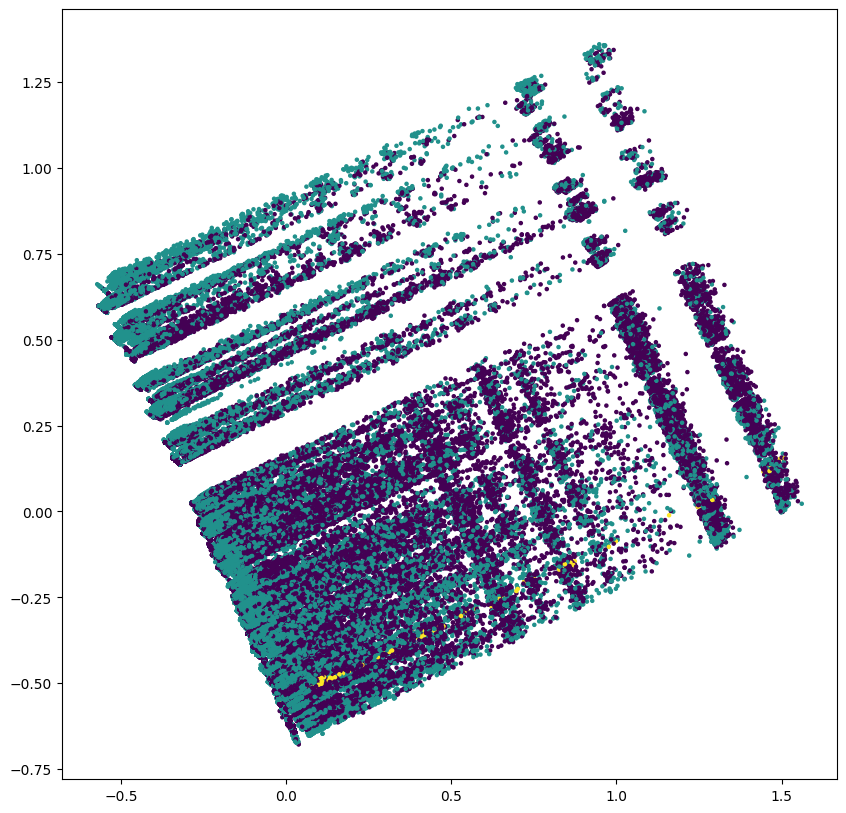

In [823]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_df['pc1'], scaled_df['pc2'],  c=scaled_df['party'].replace(dict(zip(scaled_df['party'].unique(), range(len(scaled_df['party'].unique()))))), s=5) 
# get the handles and labels of the legend
#handles, labels = plt.gca().get_legend_handles_labels()

# create a new legend with the state names and colors
#plt.legend(handles, scaled_df['state'].unique())

# display the plot
plt.show()

In [813]:
""" color_scale = [(0, 'yellow'), (0.02, 'orange'), (0.15,'red'), (1, 'purple')]
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="state", 
                        hover_data=["city_or_county", "incident_characteristics1"],
                        color="n_killed",
                        color_continuous_scale=color_scale,
                        size="n_participants",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show() """

' color_scale = [(0, \'yellow\'), (0.02, \'orange\'), (0.15,\'red\'), (1, \'purple\')]\nfig = px.scatter_mapbox(df, \n                        lat="latitude", \n                        lon="longitude", \n                        hover_name="state", \n                        hover_data=["city_or_county", "incident_characteristics1"],\n                        color="n_killed",\n                        color_continuous_scale=color_scale,\n                        size="n_participants",\n                        zoom=3, \n                        height=800,\n                        width=800)\n\nfig.update_layout(mapbox_style="open-street-map")\nfig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})\nfig.show() '